In [1]:
from tensorflow import keras
model = keras.models.load_model('Age_final.h5')
import cv2
detect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# -------------------------------------Real Time version----------------------------------- 
c = cv2.VideoCapture(0)
while(True):
    ret, img = c.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detect.detectMultiScale(gray, 1.3, 5)
    full=img
    for (x,y,w,h) in faces:
        img  = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        img1 = img[y:y+h, x:x+w]
        face = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (32,32) )
        face = np.expand_dims(face, axis=0)
        arr  = model.predict(face)
        cv2.putText(full,'Age = '+str(int(arr[0][0])), (x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(100, 80, 0, 255),3)
    cv2.imshow('img',full)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
c.release()
cv2.destroyAllWindows()

[[34.580704]]


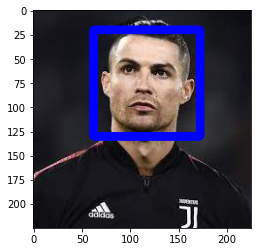

In [60]:
#-------------------------------------USE if the Face is un cropped----------------------------------
img = cv2.imread('Test_data\\z.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detect.detectMultiScale(gray, 1.3, 5)
full = img
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),8)
    img1  = img[y:y+h, x:x+w]
    face = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (32,32) )
    face = np.expand_dims(face, axis=0)
    print(model.predict(face))
    full = cv2.cvtColor(full, cv2.COLOR_RGB2BGR)
    plt.imshow(full)
#Real Age 35

In [4]:
%matplotlib inline 

[[82.360825]]


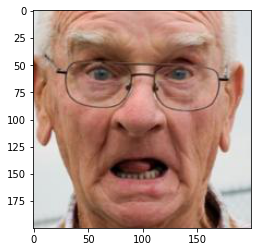

In [27]:
#---------------------------------------------FOR cropped images-------------------------------
img = cv2.imread('Test_data\\1715.png')
face = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
face = cv2.resize(face, (32,32) )
face = np.expand_dims(face, axis=0)
print(model.predict(face))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
#Real Age 85